In [20]:
import pandas as pd
import numpy as np
import math
import itertools
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

# Breaking it Down – Pseudo Code of KNN
We can implement a KNN model by following the below steps:

1. Load the data
2. Initialise the value of k
3. For getting the predicted class, iterate from 1 to total number of training data points
    1. Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
    2. Sort the calculated distances in ascending order based on distance values
    3. Get top k rows from the sorted array
    4. Get the most frequent class of these rows
    5. Return the predicted class

In [3]:
# Based of pseudo code first job is loading data
df = pd.read_csv('C:/Users/debas/OneDrive/Desktop/teleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Data Visualization and Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB676F3888>]],
      dtype=object)

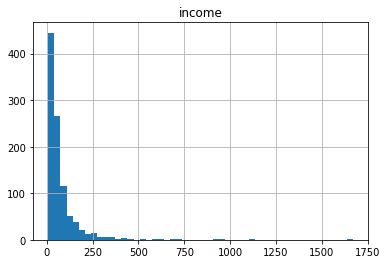

In [10]:
df.hist(column='income', bins = 50)

In [11]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [12]:
# First row of data
x = df.iloc[0]
x

region      2.0
tenure     13.0
age        44.0
marital     1.0
address     9.0
income     64.0
ed          4.0
employ      5.0
retire      0.0
gender      0.0
reside      2.0
custcat     1.0
Name: 0, dtype: float64

Euclidean distance

<a href="https://www.codecogs.com/eqnedit.php?latex=d(p,q)&space;=&space;\sqrt{(p_{1}-q_{1})^{2}&plus;(p_{2}-q_{2})^{2}&plus;....&plus;(p_{n}-q_{n})^{2}}&space;=&space;\sum_{i=1}^{n}\sqrt{(p_{i}-q_{i})^{2}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?d(p,q)&space;=&space;\sqrt{(p_{1}-q_{1})^{2}&plus;(p_{2}-q_{2})^{2}&plus;....&plus;(p_{n}-q_{n})^{2}}&space;=&space;\sum_{i=1}^{n}\sqrt{(p_{i}-q_{i})^{2}}" title="d(p,q) = \sqrt{(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+....+(p_{n}-q_{n})^{2}} = \sum_{i=1}^{n}\sqrt{(p_{i}-q_{i})^{2}}" /></a>

In [4]:
# Defining a function which calculated Euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Test the function with dummy data
data1 = [1,3,6,9,0]
data2 = [0,2.2,0,1,5]
euclideanDistance(data1, data2, 5)

11.253443917308159

In [5]:
X = df.iloc[:,0:11].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [6]:
# Data Standarization gives zero mean and unit variance. It is good practice especially for algorithms such as KNN which is based on distance of cases.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [7]:
data = pd.DataFrame(X)
data['custcat'] = df['custcat']
data.head()

,0,1,2,3,4,5,6,7,8,9,10,custcat
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650,1
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662,4
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650,3
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478,1
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006,3


In [8]:
#Randomize the dataset to get 80% training data set and rest 20% test data set.

msk = np.random.rand(len(data)) < 0.8

train = data[msk]
test = data[~msk]

#Seperating dependent variable y from independent variables X for both training and test data set.
X_train = train.iloc[:,0:11]
y_train = train['custcat']

X_test = test.iloc[:,0:11]
y_test = test['custcat']

In [10]:
train.iloc[[5],[-1]]

,custcat
10,1


In [15]:
length = X_test.shape[1] # to get total columns
k = 3
distances = {}
s = {}
n = {}

#Calulating distance between each training data point and test data points

for i in range(len(X_test)): # outer loop is for test data rows
    for x in range(len(train)): # inner loop is for training data rows
        dist = euclideanDistance(X_test.iloc[i], train.iloc[x], length)
        distances[x] = dist # output is a dictionary {0:6.23,1:2.56,2:6.8999,..........}
        
    sorted_d = sorted(distances.items(), key = lambda elem: elem[1])
    
    neighbors = []
    
    # getting only the key of the sorted dictionary for neighbors
    #Get top k rows from the sorted distionary

    for x in range(k):
        neighbors.append(sorted_d[x][0])
        
        
    classVotes = {}
   # Get the most frequent class of these rows 
    for x in range(len(neighbors)):
        response = train.iloc[neighbors[x],[-1]]
        response = response[0]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
            
    sortedVotes = sorted(classVotes.items(), key = lambda elem: elem[1], reverse = True)
    s[i] = sortedVotes[0][0]
    n[i] = neighbors
    
#Predicted customer category
yhat = s
        

In [30]:
y = df['custcat'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [31]:
# KNN using sklearn library
K = 3
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

In [32]:
yhat = neigh.predict(X_test)
yhat[:5]

array([1, 3, 1, 4, 4], dtype=int64)

We can calculate accuracy of KNN for different ks.

In [35]:
from sklearn import metrics
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confusionM = []
for n in range(1,ks):
    
    #traning model and predicitng
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    

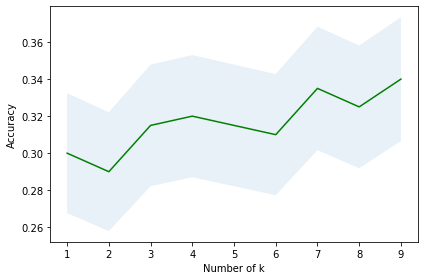

In [40]:
plt.plot(range(1,ks), mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.ylabel('Accuracy')
plt.xlabel('Number of k')
plt.tight_layout()
plt.show()

In [41]:
print('The best accuracy was with', mean_acc.max(), 'with k=', mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9
